In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

dataset_path='/content/drive/MyDrive/Braintumor_classification'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
import seaborn as sns
import os
import cv2
from keras.models import Sequential
from keras.layers import LSTM,Dense, Flatten, Dropout

In [ ]:
train_img_list = []
train_path = '/content/drive/MyDrive/Braintumor_classification/Training'

for class_ in os.listdir("/content/drive/MyDrive/Braintumor_classification/Training"):
   class_path=os.path.join(train_path,class_)
   for img in os.listdir(class_path):
    img_path = os.path.join(class_path,img)
    train_img_list.append(img_path)

train_img_list

['/content/drive/MyDrive/Braintumor_classification/Training/glioma_tumor/gg (1).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Training/glioma_tumor/gg (10).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Training/glioma_tumor/gg (100).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Training/glioma_tumor/gg (113).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Training/glioma_tumor/gg (108).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Training/glioma_tumor/gg (112).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Training/glioma_tumor/gg (11).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Training/glioma_tumor/gg (119).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Training/glioma_tumor/gg (107).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Training/glioma_tumor/gg (101).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Training/glioma_tumor/gg (109).jpg',
 '/content/drive/MyDrive/Braintumor_

In [ ]:
for class_ in sorted(os.listdir("/content/drive/MyDrive/Braintumor_classification/Training")):
  class_path = os.path.join(train_path,class_)
  print(f"{class_} - {len(os.listdir(class_path))}")


glioma_tumor - 856
meningioma_tumor - 842
no_tumor - 395
pituitary_tumor - 827


In [ ]:
img_list = []
test_path = '/content/drive/MyDrive/Braintumor_classification/Testing'
for class_ in sorted(os.listdir("/content/drive/MyDrive/Braintumor_classification/Testing")):
   class_path=os.path.join(test_path,class_)
   for img in os.listdir(class_path):
    img_path = os.path.join(class_path,img)
    img_list.append(img_path)

img_list


['/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(22).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(13).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(2).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(100).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(10).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(18).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(12).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(17).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(21).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(11).jpg',
 '/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(1).jpg',
 '/content/drive/MyDrive/Braintum

In [ ]:
for class_ in sorted(os.listdir("/content/drive/MyDrive/Braintumor_classification/Testing")):
  class_path = os.path.join(test_path,class_)
  print(f"{class_} - {len(os.listdir(class_path))}")

glioma_tumor - 110
meningioma_tumor - 115
no_tumor - 105
pituitary_tumor - 74


pituitary_tumor
(512, 512, 3)


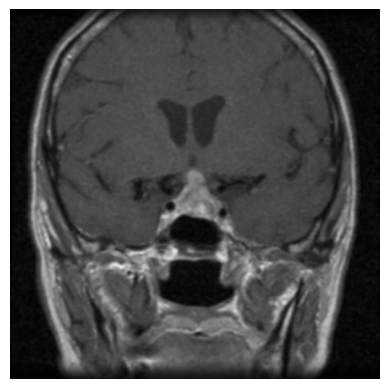

In [ ]:
def img_show(idx):
    img_idx =img_list[idx]
    class_name=img_idx.split("/")[-2]
    img = cv2.imread(img_idx)
    print(class_name)
    print(img.shape)
    plt.imshow(img)
    plt.axis("off")
    plt.show

img_show(400)


In [ ]:
len(train_img_list)

2920

In [ ]:
len(img_list)

404

In [ ]:
from PIL import Image
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

class_dict = {"no_tumor": 0, "pituitary_tumor": 1, "glioma_tumor": 2, "meningioma_tumor": 3}


pixel = []
file_path = []
label = []
train_path = '/content/drive/MyDrive/Braintumor_classification/Training'

for class_ in os.listdir(train_path):
    class_path = os.path.join(train_path, class_)
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        img = Image.open(image_path)
        gray_img = img.convert('L')
        arr = np.asarray(gray_img)
        arr_resized = cv2.resize(arr, (224, 224))
        arr_vec = arr_resized.flatten()
        pixel.append(np.array(arr_vec))
        file_path.append(image_path)
        label.append(class_dict[class_])
df = pd.DataFrame()
df['Filename'] = file_path
df['Pixel'] = pixel
df['Label'] = label

df.to_pickle("Brain_tumor.pkl")
#df.to_csv("Brain_tumor.csv")

In [ ]:
df['Pixel'][100].shape

In [ ]:
class_dict = {"no_tumor": 0, "pituitary_tumor": 1, "glioma_tumor": 2, "meningioma_tumor": 3}

pixel = []
file_path = []
label = []
test_path = '/content/drive/MyDrive/Braintumor_classification/Testing'

for class_ in sorted(os.listdir(test_path)):
    class_path = os.path.join(test_path, class_)
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        img = Image.open(image_path)
        gray_img = img.convert('L')
        arr = np.asarray(gray_img)
        arr_resized = cv2.resize(arr, (224, 224))
        arr_vec = arr_resized.flatten()
        pixel.append(np.array(arr_vec))
        file_path.append(image_path)
        label.append(class_dict[class_])

df = pd.DataFrame()
df['Filename'] = file_path
df['Pixel'] = pixel
df['Label'] = label

df.to_pickle("Brain_tumor_test.pkl")
#df.to_csv("Brain_tumor_test.csv")

In [ ]:
df['Pixel'][5].shape

In [ ]:
for i in range(5):
    img_array = np.array(df['Pixel'][i]).reshape((224, 224))
    plt.imshow(img_array, cmap='gray')
    plt.title(f'Label-1: {label[i]}')
    plt.show()

In [ ]:
df=pd.read_pickle("Brain_tumor.pkl")
df.head()

In [ ]:
df=pd.read_pickle("Brain_tumor_test.pkl")
df.head(150)

In [ ]:
df_train = pd.read_pickle("/content/Brain_tumor.pkl")
df_test = pd.read_pickle("/content/Brain_tumor_test.pkl")

In [ ]:
X_train = np.array(df_train['Pixel'].tolist())
y_train = pd.get_dummies(df_train['Label']).values

X_test = np.array(df_test['Pixel'].tolist())
y_test = pd.get_dummies(df_test['Label']).values


In [ ]:
import tensorflow as tf
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(224 * 224,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [ ]:
history = model.fit(X_train,y_train,batch_size = 64,validation_data=(X_test,y_test),epochs=50,callbacks=[early_stopping,])

In [ ]:
train_accuracy = history.history['accuracy'][-1]
test_accuracy = history.history['val_accuracy'][-1]

print(f'Training Accuracy: {train_accuracy*100:.4f}')
print(f'Testing Accuracy: {test_accuracy*100:.4f}')

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
accuracy_metrics = ['accuracy', 'val_accuracy']
df = pd.DataFrame({key: history.history[key] for key in accuracy_metrics})
df.plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
model.save("Predict_tumor.h5")

In [ ]:
from keras.models import load_model

model=load_model("/content/drive/MyDrive/Braintumor_classification/Predict_tumor.h5")


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

class_mapping = {"no_tumor": 0, "pituitary_tumor": 1, "glioma_tumor": 2, "meningioma_tumor": 3}

img_path = '/content/drive/MyDrive/Braintumor_classification/Testing/pituitary_tumor/image(36).jpg'
img = image.load_img(img_path, target_size=(224, 224))
gray_img = img.convert('L')
arr = np.asarray(gray_img)
arr_resized = cv2.resize(arr, (224, 224))
arr_flattened = arr_resized.flatten()

input_data = arr_flattened.reshape(1, -1)


predictions = model.predict(input_data)

predicted_class = np.argmax(predictions, axis=1)
predicted_class_name = list(class_mapping.keys())[list(class_mapping.values()).index(predicted_class[0])]

print(f"Predicted Class: {predicted_class[0]} - {predicted_class_name}")


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

class_mapping = {"no_tumor": 0, "pituitary_tumor": 1, "glioma_tumor": 2, "meningioma_tumor": 3}

img_path = '/content/drive/MyDrive/Braintumor_classification/Testing/no_tumor/image(101).jpg'
img = image.load_img(img_path, target_size=(224, 224))
gray_img = img.convert('L')
arr = np.asarray(gray_img)
arr_resized = cv2.resize(arr, (224, 224))
arr_flattened = arr_resized.flatten()

input_data = arr_flattened.reshape(1, -1)


predictions = model.predict(input_data)

predicted_class = np.argmax(predictions, axis=1)
predicted_class_name = list(class_mapping.keys())[list(class_mapping.values()).index(predicted_class[0])]

print(f"Predicted Class: {predicted_class[0]} - {predicted_class_name}")


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

class_mapping = {"no_tumor": 0, "pituitary_tumor": 1, "glioma_tumor": 2, "meningioma_tumor": 3}

img_path = '/content/drive/MyDrive/Braintumor_classification/Testing/meningioma_tumor/image(109).jpg'
img = image.load_img(img_path, target_size=(224, 224))
gray_img = img.convert('L')
arr = np.asarray(gray_img)
arr_resized = cv2.resize(arr, (224, 224))
arr_flattened = arr_resized.flatten()

input_data = arr_flattened.reshape(1, -1)


predictions = model.predict(input_data)

predicted_class = np.argmax(predictions, axis=1)
predicted_class_name = list(class_mapping.keys())[list(class_mapping.values()).index(predicted_class[0])]

print(f"Predicted Class: {predicted_class[0]} - {predicted_class_name}")


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

class_mapping = {"no_tumor": 0, "pituitary_tumor": 1, "glioma_tumor": 2, "meningioma_tumor": 3}

img_path = '/content/drive/MyDrive/Braintumor_classification/Testing/glioma_tumor/image(47).jpg'
img = image.load_img(img_path, target_size=(224, 224))
gray_img = img.convert('L')
arr = np.asarray(gray_img)
arr_resized = cv2.resize(arr, (224, 224))
arr_flattened = arr_resized.flatten()

input_data = arr_flattened.reshape(1, -1)


predictions = model.predict(input_data)

predicted_class = np.argmax(predictions, axis=1)
predicted_class_name = list(class_mapping.keys())[list(class_mapping.values()).index(predicted_class[0])]

print(f"Predicted Class: {predicted_class[0]} - {predicted_class_name}")
